In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import enchant
import cloudpickle
%matplotlib inline

In [2]:
y = cloudpickle.load(open("pickles/forum_label.pkl", "rb" ) )

In [3]:
disease_db = cloudpickle.load(open("pickles/disease_db.pkl", "rb" ) )

In [4]:
tfidf = cloudpickle.load(open("pickles/forum_vecrepresent.pkl", "rb" ) )
forum_vectorizer = cloudpickle.load(open("pickles/forum_vectorizer.pkl", "rb" ) )

In [5]:
print tfidf.shape
print y.shape

(13458, 836)
(13458, 72)


Just randomly assigning some pregnancies to be 0 cause they are super over represented

In [6]:
dropi = [i for i,d in enumerate(disease_db) if d['name']=='pregnancy'][0]
tozero = y[:,dropi]==1
y[tozero,dropi]=1*(np.random.random((tozero.sum(),))<0.1)

In [7]:
print y[:,dropi].sum()
print tfidf.shape
print y.shape

849
(13458, 836)
(13458, 72)


In [8]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf, y, test_size=0.1, random_state=42)

In [29]:
# from sklearn.naive_bayes import MultinomialNB
# clf = MultinomialNB().fit(tfidf_train, y_train)
# from sklearn.linear_model import LogisticRegression
# from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

feat_name = np.array(forum_vectorizer.get_feature_names())
from sklearn.ensemble import RandomForestClassifier
for col in range(y_train.shape[1]):
    print disease_db[col]['name']
    clf = RandomForestClassifier(n_estimators=20).fit(X_train, y_train[:,col])
    disease_db[col]['accuracy'] = accuracy_score(clf.predict(X_test), y_test[:,col])
    disease_db[col]['f1'] = f1_score(clf.predict(X_test), y_test[:,col])
    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1][:10]
    disease_db[col]['words'] = ';'.join(feat_name[indices])
    del clf

gerd
acne
aids
adenomyosis
cancer
allergies
hair loss
amenorrhea
gas
anemia
anorgasmia
anxiety
appendicitis
arthritis
asthma
back pain
bacterial vaginosis
vaginitis
folliculitis
cystitis
high blood pressure
stroke
breast cancer
breast pain
bronchitis
burns
flu
birth defects
bleeding disorders
blood clot
family history
breastfeeding
candidiasis
thrush
chlamydia
common cold
diabetes
nutrition
ear infection
ebv infection
pid
pneumonia
genital herpes
genital warts
gonorrhea
zoster
hypertension
infertility
inflammatory bowel disease
molluscum contagiosum
mucus
outbreaks
pad
pcp
pelvic inflammatory disease
pregnancy
psoriasis
runny nose
salt
scabies
sexually transmitted diseases
syphilis
trichomoniasis
shingles
sinus infection
sore throat
staph
strep throat
tinea
video
vitamins
yeast infection


/home/will/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1076: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


In [17]:
for a in disease_db:
    print "%s,%s,%s,%s" % (a['name'],a['name'],a['accuracy'],a['words'])

gerd,gerd,0.995542347697,eat;abdomin;bit;problem;ani;goe;wors;wa;left;sever
acne,acne,0.986627043091,face;pimpl;skin;hair;effect;wors;pill;use;start;im
aids,aids,0.973254086181,std;hiv;sex;ani;thi;bump;infect;day;week;peni
adenomyosis,adenomyosis,0.988112927192,pain;pelvic;thi;period;sever;year;bad;feel;start;cramp
cancer,cancer,0.979940564636,cancer;period;lump;hpv;breast;pap;left;doctor;famili;abnorm
allergies,allergies,0.991084695394,ear;throat;nose;problem;cold;bad;rash;thi;look;medic
hair loss,hair loss,0.996285289747,hair;loss;ani;hormon;month;ha;extrem;im pregnant;lose;prescrib
amenorrhea,amenorrhea,0.979940564636,period;old;month;wa;havent;thi;period sinc;sinc;year;test
gas,gas,0.980683506686,stomach;eat;pass;constip;feel;bloat;pain;abdomin;abdomin pain;like
anemia,anemia,0.94279346211,bleed;heavi;blood;period;stop;month;im;day;week;pregnant
anorgasmia,anorgasmia,0.993313521545,orgasm;feel;anyth;situat;masturb;wa;love;ani;thi;sex
anxiety,anxiety,0.962109955423,erect;depress;mas

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

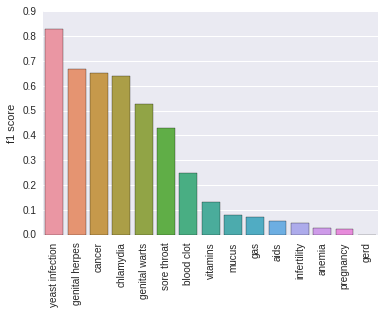

In [34]:
import matplotlib.pyplot as plt
scores = sorted(disease_db, key=lambda x: -x['f1'])
scores = scores[:15]
sns.barplot(x=[x['name'] for x in scores], y=[x['f1'] for x in scores])
plt.ylabel('f1 score')
plt.xticks(rotation=90)